In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
import scipy.sparse
from scipy.sparse import csr_matrix

In [2]:
data = pd.read_table('10000.txt', names=['user_id', 'song_id', 'listen_count'])
song_data = pd.read_csv('song_data.csv')

In [3]:
data.head()

,user_id,song_id,listen_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


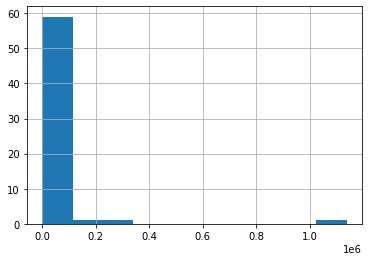

In [4]:
data.listen_count.value_counts()[data.listen_count.value_counts()>100].hist()

In [5]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,2000000,76353,6d625c6557df84b60d90426c0116138b617b9449,711,NaN,NaN,NaN,NaN,NaN,NaN,NaN
song_id,2000000,10000,SOFRQTD12A81C233C0,8277,NaN,NaN,NaN,NaN,NaN,NaN,NaN
listen_count,2000000.0,NaN,NaN,NaN,3.045485,6.57972,1.0,1.0,1.0,3.0,2213.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 3 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   user_id       object
 1   song_id       object
 2   listen_count  int64 
dtypes: int64(1), object(2)
memory usage: 45.8+ MB


In [7]:
data[data.listen_count<1]

,user_id,song_id,listen_count


In [8]:
#data_codes = data.copy(deep=True)

In [9]:
#data_codes['user_id'] = data['user_id'].astype("category").cat.codes

#data_codes['song_id'] = data['song_id'].astype("category").cat.codes

In [10]:
users_50=np.array(data.groupby('user_id').count()[data.groupby('user_id').count()['song_id']>150].index)

In [11]:
data = data.query('user_id in @users_50')

In [12]:
data=data.drop_duplicates()

In [13]:
song_data=song_data.drop_duplicates()

In [14]:
song_data[song_data.song_id == 'SOAXGDH12A8C13F8A1']['title'].values[0]

'Dog Days Are Over (Radio Edit)'

In [15]:
knnData = pd.merge(data, song_data)
knnData

,user_id,song_id,listen_count,title,release,artist_name,year
0,5a905f000fc1ff3df7ca807d57edb608863db05d,SOAFTRR12AF72A8D4D,1,Harder Better Faster Stronger,Discovery,Daft Punk,2007
1,a58de017cbeda1763ea002fe027ed41b4ed53109,SOAFTRR12AF72A8D4D,3,Harder Better Faster Stronger,Discovery,Daft Punk,2007
2,884209a41deb55df792f074bccf8af1c1c31768b,SOAFTRR12AF72A8D4D,1,Harder Better Faster Stronger,Discovery,Daft Punk,2007
3,c24ec42f0e449ff39a95a01f0795f833b898f71b,SOAFTRR12AF72A8D4D,1,Harder Better Faster Stronger,Discovery,Daft Punk,2007
4,1ee591a388274035a4fd8a4ae40a9589d320bb9d,SOAFTRR12AF72A8D4D,1,Harder Better Faster Stronger,Discovery,Daft Punk,2007
...,...,...,...,...,...,...,...
185483,7bc672d87d7fb01c57eb9ce32bfea2e50619a7b6,SOAMFRD12AF72A84BD,5,Fireworks,All Things To All People,Carpark North,2005
185484,17847f9b51594b8ae2da8b72215e3588604e8390,SOPPHII12A6701F35D,5,Untitled (Domestic Album Version),Still Not Getting Any,Simple Plan,2004
185485,c65a346ab8f41fb56926b503ece810f358b0d241,SOLEMPP12A8AE4640B,1,Halo (Explicit Album Version),The Blackening,Machine Head,0
185486,2078b23380f2a80615fb9829621f7dc6cc6c7a82,SOUZRZK12A8C13FF59,1,The TIde (LP Version),Sunsets & Car Crashes,The Spill Canvas,2004


## Popularity Recommender

In [16]:
data_grouped = data.groupby(['song_id']).agg({'user_id': 'count'}).reset_index()
data_grouped.rename(columns = {'user_id': 'score'},inplace=True)
data_grouped = data_grouped.merge(song_data[['title','song_id']], on='song_id',how='left')
data_sort = data_grouped.sort_values(['score', 'song_id'], ascending = [0,1])
data_sort['Rank'] = data_sort['score'].rank(ascending=0, method='first')

In [17]:
data_sort.head(10)# top 10 songs

,song_id,score,title,Rank
353,SOAXGDH12A8C13F8A1,338,Dog Days Are Over (Radio Edit),1.0
8621,SOWCKVR12A8C142411,313,Use Somebody,2.0
8622,SOWCKVR12A8C142411,313,Use Somebody,3.0
2238,SOFRQTD12A81C233C0,296,Sehr kosmisch,4.0
5565,SONYKOW12AB01849C9,271,Secrets,5.0
7447,SOSXLTC12AF72A7F54,271,Revelry,6.0
1126,SOCVTLJ12A6310F0FD,270,Clocks,7.0
706,SOBUBLL12A58A795A8,264,They Might Follow You,8.0
4178,SOKLRPJ12A8C13C3FE,263,The Scientist,9.0
6327,SOPXKYD12A6D4FA876,249,Yellow,10.0


In [18]:
popularity_recommendations = data_sort.head(10)

In [19]:
 def recommend(user_id):    
        user_recommendations = popularity_recommendations
        
        #Add user_id column for which the recommendations are being generated
        user_recommendations['user_id'] = user_id
    
        #sorting to get user_id column to the front
        cols = user_recommendations.columns.tolist()
        cols = cols[-1:] + cols[:-1]
        user_recommendations = user_recommendations[cols]
        
        return user_recommendations

In [20]:
recommend('5a905f000fc1ff3df7ca807d57edb608863db05d')

C:\Users\IT\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,user_id,song_id,score,title,Rank
353,5a905f000fc1ff3df7ca807d57edb608863db05d,SOAXGDH12A8C13F8A1,338,Dog Days Are Over (Radio Edit),1.0
8621,5a905f000fc1ff3df7ca807d57edb608863db05d,SOWCKVR12A8C142411,313,Use Somebody,2.0
8622,5a905f000fc1ff3df7ca807d57edb608863db05d,SOWCKVR12A8C142411,313,Use Somebody,3.0
2238,5a905f000fc1ff3df7ca807d57edb608863db05d,SOFRQTD12A81C233C0,296,Sehr kosmisch,4.0
5565,5a905f000fc1ff3df7ca807d57edb608863db05d,SONYKOW12AB01849C9,271,Secrets,5.0
7447,5a905f000fc1ff3df7ca807d57edb608863db05d,SOSXLTC12AF72A7F54,271,Revelry,6.0
1126,5a905f000fc1ff3df7ca807d57edb608863db05d,SOCVTLJ12A6310F0FD,270,Clocks,7.0
706,5a905f000fc1ff3df7ca807d57edb608863db05d,SOBUBLL12A58A795A8,264,They Might Follow You,8.0
4178,5a905f000fc1ff3df7ca807d57edb608863db05d,SOKLRPJ12A8C13C3FE,263,The Scientist,9.0
6327,5a905f000fc1ff3df7ca807d57edb608863db05d,SOPXKYD12A6D4FA876,249,Yellow,10.0


## Collaborative Filtering

In [21]:
## User User Colab

In [22]:
song_pivot=data.pivot(index='user_id',columns='song_id',values='listen_count')
song_pivot=song_pivot.fillna(0)
song_pivot.shape

(854, 9916)

In [23]:
from sklearn.neighbors import NearestNeighbors
knn=NearestNeighbors(n_neighbors=10,metric='cosine')
model_user=knn.fit(song_pivot)

In [24]:
model_user.kneighbors() #Returns indices of and distances to the neighbors of each point.

(array([[0.80918447, 0.87638443, 0.87934155, ..., 0.91236726, 0.92035184,
         0.92205072],
        [0.26036793, 0.28617322, 0.31086753, ..., 0.37312536, 0.37853978,
         0.38985032],
        [0.80453678, 0.81509306, 0.83192022, ..., 0.91728291, 0.91821372,
         0.91874545],
        ...,
        [0.81137238, 0.8221961 , 0.86684152, ..., 0.92481812, 0.93040513,
         0.9326671 ],
        [0.8210625 , 0.82742355, 0.82974891, ..., 0.87713056, 0.8786731 ,
         0.8808931 ],
        [0.77012693, 0.80739402, 0.82222584, ..., 0.8964905 , 0.89715142,
         0.90279844]]),
 array([[365, 653, 620, ..., 842, 406, 572],
        [636, 276, 529, ..., 266, 132, 416],
        [759, 847, 583, ..., 410, 396, 426],
        ...,
        [125,  58, 733, ...,  62, 794, 752],
        [ 38, 288, 718, ..., 402, 148, 185],
        [594, 102, 469, ..., 804, 445, 611]], dtype=int64))

In [25]:
def user_user(model, matrix, data, search_index):
    distances, indices = model.kneighbors([matrix.iloc[search_index, :]], n_neighbors = 10)
    for i in range(0, len(distances.flatten())):
        if i == 0:
            print("Searching recommendation for user: ", matrix.index[search_index])
        else:
            rows = data.loc[data['user_id'] == matrix.index[indices.flatten()[i]] ]
            data_user = pd.DataFrame(rows)
            data_user['distance']= distances.flatten()[i]
            return data_user

In [26]:
search_index = np.random.choice(song_pivot.shape[0])
search_index #random_user

758

In [27]:
user_user(model_user, song_pivot, knnData, search_index)

Searching recommendation for user:  e3109d2ab81b2f3eab71cf0d992395a2d30b0d96


,user_id,song_id,listen_count,title,release,artist_name,year,distance
252,a59172a6d20b0f970783b7ee8df9134fb563ccda,SOAJJDS12A8C13A3FB,1,I Got Mine,Attack & Release,The Black Keys,2008,0.801122
1854,a59172a6d20b0f970783b7ee8df9134fb563ccda,SOCQQSU12AB0185BF4,1,Next Girl,Tighten Up,The Black Keys,2010,0.801122
2335,a59172a6d20b0f970783b7ee8df9134fb563ccda,SODEAJC12A58A7769F,1,O Samba E O Tango,Fina Estampa Ao Vivo,Caetano Veloso,1995,0.801122
2429,a59172a6d20b0f970783b7ee8df9134fb563ccda,SODEYDM12A58A77072,4,Lights & Music,Lights & Music,Cut Copy,2008,0.801122
3491,a59172a6d20b0f970783b7ee8df9134fb563ccda,SOETSTN12A81C219A9,1,Silent Shout,Silent Shout,The Knife,0,0.801122
...,...,...,...,...,...,...,...,...
184236,a59172a6d20b0f970783b7ee8df9134fb563ccda,SOKBOTR12A67ADE318,7,It's My Life,New Romantics,Talk Talk,1984,0.801122
184245,a59172a6d20b0f970783b7ee8df9134fb563ccda,SOWODBS12A67ADE31B,1,Life's What You Make It,Natural History - The Very Best Of Talk Talk,Talk Talk,1986,0.801122
184413,a59172a6d20b0f970783b7ee8df9134fb563ccda,SOIMTII12A6D4F662A,1,Reign Of The Tyrants,Decade Of The Nail-spiked Bat,Jag Panzer,1984,0.801122
185019,a59172a6d20b0f970783b7ee8df9134fb563ccda,SOEFHAF12A6D4FB311,1,Fistful of Love,The Lake,Antony & The Johnsons,2004,0.801122


In [28]:
# Item Item Colab

In [29]:
sparse_matrix = data.pivot(index='song_id',columns='user_id',values='listen_count')
sparse_matrix = sparse_matrix.fillna(0)

In [30]:
from sklearn.neighbors import NearestNeighbors
knn=NearestNeighbors(n_neighbors=10,metric='cosine')
model_item=knn.fit(sparse_matrix)

In [31]:
model_item.kneighbors()

(array([[0.01251614, 0.11471046, 0.11676758, ..., 0.23983457, 0.24627232,
         0.30174346],
        [0.37261875, 0.37431309, 0.5796809 , ..., 0.66925173, 0.68596689,
         0.68898227],
        [0.19417704, 0.3318469 , 0.34966752, ..., 0.52084258, 0.53119277,
         0.5401455 ],
        ...,
        [0.46118409, 0.50813062, 0.5180684 , ..., 0.61899962, 0.61899962,
         0.62161821],
        [0.60206627, 0.60526903, 0.63244337, ..., 0.64892352, 0.65073752,
         0.65093664],
        [0.06392609, 0.11296811, 0.16600154, ..., 0.27997696, 0.29004771,
         0.29684889]]),
 array([[4743, 8383, 1640, ..., 6292, 1355, 3884],
        [4907, 2459, 3632, ..., 3733, 1079, 2809],
        [3944, 3017, 3890, ..., 3726, 8020, 3972],
        ...,
        [6443, 7398, 5982, ..., 5643,  474, 3654],
        [6761, 6479, 2983, ..., 6423, 1509, 7710],
        [2338, 8534, 3990, ..., 8037, 9588, 6274]], dtype=int64))

In [32]:
def item_item(model, matrix, data, search_index):
    distances, indices = model.kneighbors([matrix.iloc[search_index, :]], n_neighbors = 10)
    for i in range(0, len(distances.flatten())):
        if i == 0:
            print("Searching recommendation for song: ", matrix.index[search_index])
        else:
            rows = data.loc[data['song_id'] == matrix.index[indices.flatten()[i]] ]
            print(" Recommendation", i, ": ")
            print("   Song: ", rows.title.values[0])  
            print("   Artist: ",  rows.artist_name.values[0])
            print("   Distance: ", distances.flatten()[i])

In [33]:
song_id ='SOZARJQ12A6D4F66CE'
for i in range(0, sparse_matrix.shape[0]):
    if song_id == sparse_matrix.index[i]:
        print(i, sparse_matrix.index[i])
        search_index=i

9594 SOZARJQ12A6D4F66CE


In [34]:
search_index

9594

In [35]:
item_item(model_item,sparse_matrix,knnData, search_index )

Searching recommendation for song:  SOZARJQ12A6D4F66CE
 Recommendation 1 : 
   Song:  Kids Of The Future
   Artist:  Jonas Brothers
   Distance:  0.3092954714547853
 Recommendation 2 : 
   Song:  Don't Leave Me
   Artist:  The All-American Rejects
   Distance:  0.3168535900660545
 Recommendation 3 : 
   Song:  When You Look Me In The Eyes
   Artist:  Jonas Brothers
   Distance:  0.321214414992408
 Recommendation 4 : 
   Song:  Goodbye
   Artist:  Miley Cyrus
   Distance:  0.3298715310118112
 Recommendation 5 : 
   Song:  Shelf
   Artist:  Jonas Brothers
   Distance:  0.33264640201594164
 Recommendation 6 : 
   Song:  Elevator
   Artist:  The Pussycat Dolls
   Distance:  0.3330804502263979
 Recommendation 7 : 
   Song:  Year 3000
   Artist:  Jonas Brothers
   Distance:  0.3410310682623292
 Recommendation 8 : 
   Song:  I'm Done
   Artist:  The Pussycat Dolls
   Distance:  0.35498939341902824
 Recommendation 9 : 
   Song:  One More Sad Song
   Artist:  The All-American Rejects
   Distanc